### show image

In [1]:
def myshow(img, title=None, margin=0.05, dpi=100):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (4 + margin) * ysize / dpi, (4 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
   
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

### load data

In [3]:
import os,time
import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline

%run update_path_to_download_script
#from downloaddata import fetch_data as fdata

#from downloaddata import fetch_data_all
import numpy as np

# import tensorflow as tf
# import tensorlayer as tl
# from tensorlayer.layers import *

inputDir = '../data/train'
outputDir = 'output'

ERROR:root:File `'update_path_to_download_script.py'` not found.


In [10]:
def loadData( inputDir, padding=0 ):
    imageflairFilenames = glob.glob(os.path.join(inputDir, "Utrecht", "*","pre","FLAIR.nii.gz"))
    imageT1Filenames = glob.glob(os.path.join(inputDir, "Utrecht", "*","pre","T1.nii.gz"))
    labelFilenames= glob.glob(os.path.join(inputDir, "Utrecht", "*","wmh.nii.gz"))
    images = None # shape: (numImages, z, y, x, channels=1)
    labels = None
    masks  = None
    print(len(imageflairFilenames))
    for imageflairFilenames, imageT1Filenames, labelFilenames in zip(imageflairFilenames, imageT1Filenames, labelFilenames):
        # Load the images
        flairImage = sitk.ReadImage(imageflairFilenames)
        T1Image = sitk.ReadImage(imageT1Filenames)
        labelImage = sitk.ReadImage(labelFilenames)
        # Convert to arrays
        flairArray = np.pad(sitk.GetArrayFromImage(flairImage), [(0,0),(padding,padding),(padding,padding)], 'constant')
        T1Array = np.pad(sitk.GetArrayFromImage(T1Image), [(0,0),(padding,padding),(padding,padding)], 'constant')
        labelArray = np.pad(sitk.GetArrayFromImage(labelImage), [(0,0),(padding,padding),(padding,padding)], 'constant')
        maskArray = labelArray > 0
        print("flairArray",flairArray.shape)
        print("T1Array",T1Array.shape)
        print("labelArray",labelArray.shape)
        print("maskArray",maskArray.shape)
        # Add to the images/labels array
        if images is None:
            images = flairArray.reshape([1] + list(flairArray.shape) + [1])
            images = np.concatenate([images, T1Array.reshape([1] + list(T1Array.shape) + [1])], axis=4)
            labels = labelArray.reshape([1] + list(labelArray.shape) + [1])
            masks  = maskArray.reshape([1] + list(maskArray.shape) + [1])
        else:
            tempArray = np.concatenate([flairArray.reshape([1] + list(flairArray.shape) + [1]), T1Array.reshape([1] + list(T1Array.shape) + [1])], axis=4)
            
            images = np.concatenate([images, tempArray])
            
            labels = np.concatenate([labels, labelArray.reshape([1] + list(labelArray.shape) + [1])])
            masks  = np.concatenate([masks, maskArray.reshape([1] + list(maskArray.shape) + [1])])
                    
    return images, labels, masks

In [152]:
testImages, testLabels, testMasks = loadData(inputDir)
testNonZeroIdx = np.nonzero(testMasks)

15
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 24

In [155]:
testLabels.max()

2.0

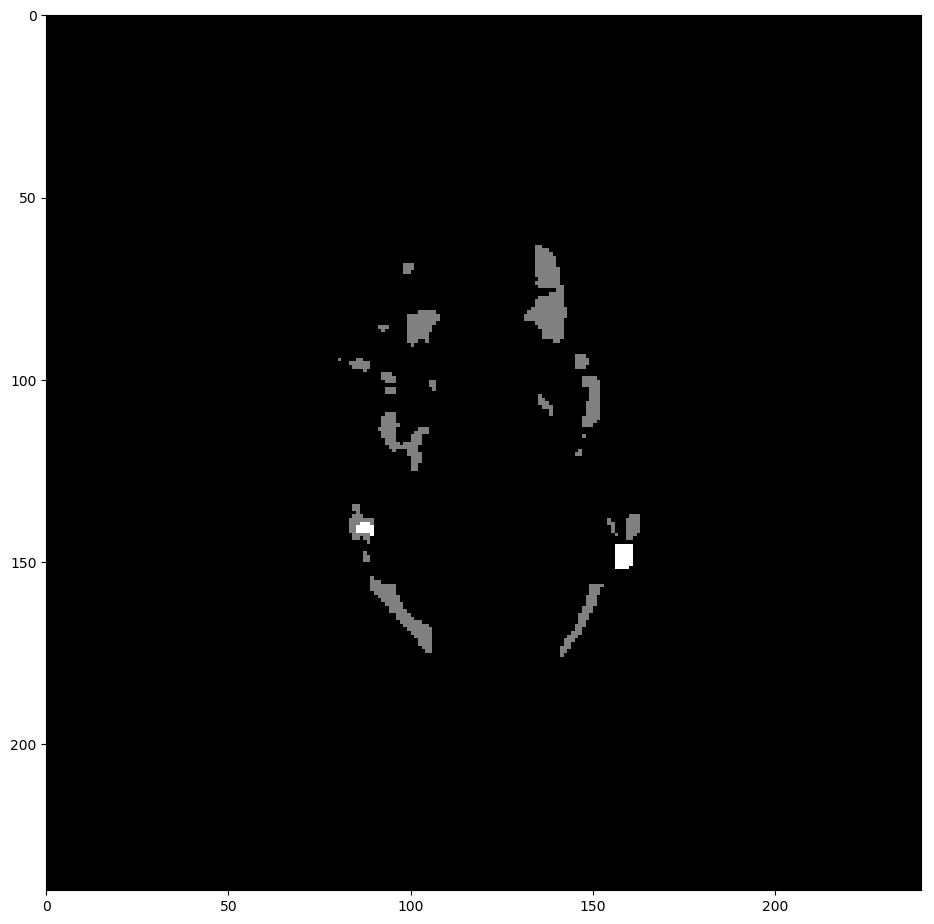

In [7]:
myshow(sitk.GetImageFromArray(y))

### select data

In [137]:
images = []
lables = []

In [156]:
for i in range(15):
    for j in range(48):
        if not np.all(testMasks[i,j,:,:,0]== False):
            lables.append(testLabels[i,j,:,:,:])
            images.append(testImages[i,j,:,:,:])


In [157]:
lables[2].shape

(240, 240, 1)

In [158]:
images[2].shape

(240, 240, 2)

In [159]:
X = np.asarray(images)
y = np.asarray(lables).astype(int)

print(X.shape, X.min(), X.max()) # (240, 240, 4) -0.380588 2.62761
print(y.shape, y.min(), y.max()) # (240, 240, 1) 0 1 

(804, 240, 240, 2) 0.0 3168.0
(804, 240, 240, 1) 0 2


In [162]:
y[y >1] = 0

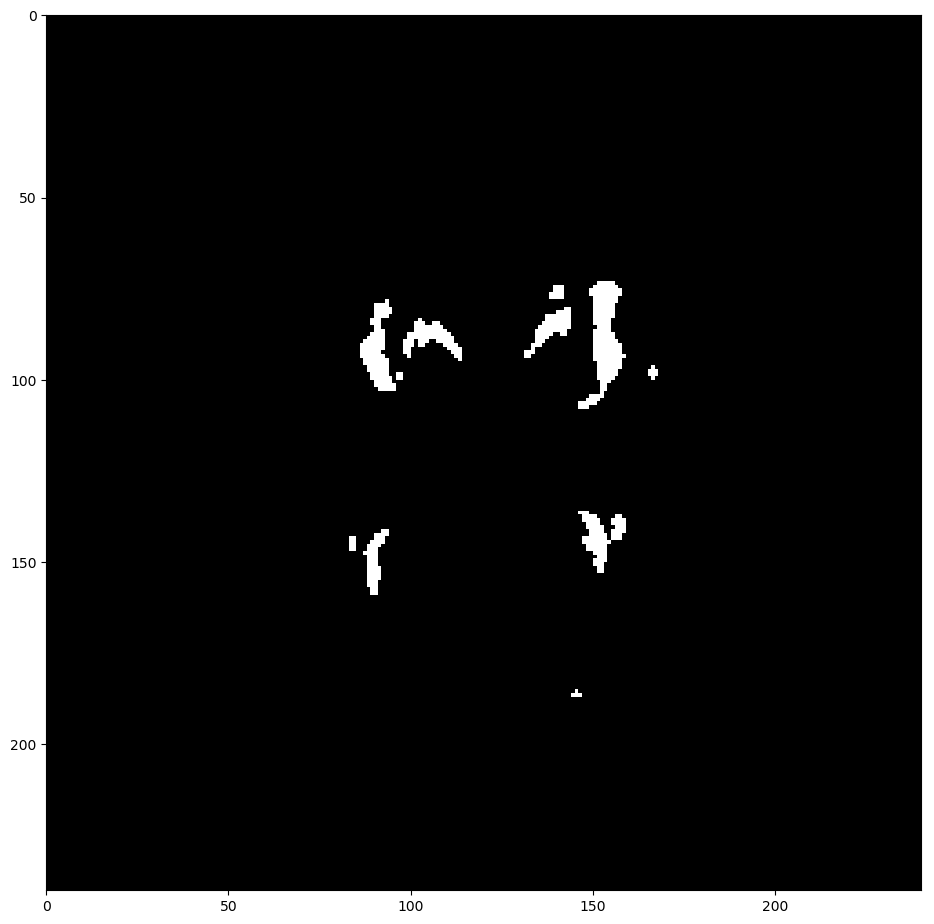

In [163]:
myshow(sitk.GetImageFromArray(y[340,:,:,0]))

### reshape data in the model

### mask

### pack data

### change label to binaray y[y >1] = 0